In [48]:
import pandas as pd

In [49]:
# create df from iris.csv dataset
data = "Resources/iris.csv"
iris_df = pd.read_csv(data)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
# drop class bc we dont need it for unsupervised ml
iris_df = iris_df.drop(["class"], axis=1)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
list(iris_df.columns.values)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [52]:
# re order the columns so lengths are first
iris_df = iris_df[["sepal_length", "petal_length", "sepal_width", "petal_width"]]
iris_df.head()

,sepal_length,petal_length,sepal_width,petal_width
0,5.1,1.4,3.5,0.2
1,4.9,1.4,3.0,0.2
2,4.7,1.3,3.2,0.2
3,4.6,1.5,3.1,0.2
4,5.0,1.4,3.6,0.2


In [53]:
# export the clean and rearranged data frame to csv to use later
outpu_path = "Resources/clean_iris_data.csv"
iris_df.to_csv(outpu_path, index=False)

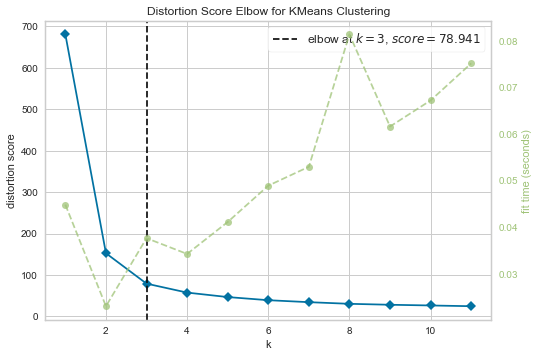

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# instantiate kmeans model
kmmodel = KMeans()
# instantiate visualizer with node range from 4-11 (4-12 end point exclusive)
visualizer = KElbowVisualizer(kmmodel, k=(1,12))
# fit the data to the visualizer
visualizer.fit(iris_df)
# finalize and render the figure
visualizer.show()

In [55]:
# initialize the kmeans model with K=3 clusters, (because we know there are 3 and also the elbowviz confirmed 3)
model = KMeans(n_clusters=3, random_state=5)
model

KMeans(n_clusters=3, random_state=5)

In [56]:
#fit the model
model.fit(iris_df)

KMeans(n_clusters=3, random_state=5)

In [57]:
# get predictions
predictions = model.predict(iris_df)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [58]:
#add a new class column to iris_df
iris_df["class"] = model.labels_
iris_df 

,sepal_length,petal_length,sepal_width,petal_width,class
0,5.1,1.4,3.5,0.2,1
1,4.9,1.4,3.0,0.2,1
2,4.7,1.3,3.2,0.2,1
3,4.6,1.5,3.1,0.2,1
4,5.0,1.4,3.6,0.2,1
...,...,...,...,...,...
145,6.7,5.2,3.0,2.3,2
146,6.3,5.0,2.5,1.9,0
147,6.5,5.2,3.0,2.0,2
148,6.2,5.4,3.4,2.3,2


# visualize the results

In [59]:
import plotly.express as px
import hvplot.pandas

In [60]:
iris_df = pd.read_csv()
# create a scatterplot of iris_df
iris_df.hvplot.scatter(x="sepal_length", y="sepal_width", by="class")

:NdOverlay   [class]
   :Scatter   [sepal_length]   (sepal_width)

In [61]:
# Plotting the clusters with three features
fig = px.scatter_3d(iris_df, x="petal_width", y="sepal_length", z="petal_length", color="class", symbol="class", size="sepal_width",width=800)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()

In [62]:
#creat3 an empty list to hold inertia values. We'll also store a range of K values we want to test
inertia = []
k = list(range(1, 11))

In [63]:
# Next, we'll loop through each K value, find the inertia, and store it into our list. Enter the code in the next cell:
# Looking for the best K
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(iris_df)
    inertia.append(km.inertia_)


In [64]:
print(inertia)

[776.9843999999998, 247.65250340400698, 78.94084142614601, 59.4381655761024, 47.07446112266112, 39.47761881496882, 35.07013782714871, 33.20837943918827, 28.79485002742355, 27.037875152625148]


In [65]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

# PCA

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [76]:
file_path = "Resources/"
iris_df = pd.read_csv(file_path + "clean_iris_data.csv")
#standardize the data with standardscaler
iris_scaled = StandardScaler().fit_transform(iris_df)
print(iris_scaled[:5])

[[-0.90068117 -1.3412724   1.03205722 -1.31297673]
 [-1.14301691 -1.3412724  -0.1249576  -1.31297673]
 [-1.38535265 -1.39813811  0.33784833 -1.31297673]
 [-1.50652052 -1.2844067   0.10644536 -1.31297673]
 [-1.02184904 -1.3412724   1.26346019 -1.31297673]]


In [77]:
#Initialize a PCA model
pca = PCA(n_components=2)

In [78]:
# get two principal components for the iris data
iris_pca = pca.fit_transform(iris_scaled)

In [80]:
iris_pca_df = pd.DataFrame(data=iris_pca, columns=["principal_component_1", "principal_component_2"])
iris_pca_df.head()

,principal_component_1,principal_component_2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [81]:
# fetch the explained variance
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [82]:
# Find the best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(iris_pca_df)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [83]:
# Initialize the K-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(iris_pca_df)

# Predict clusters
predictions = model.predict(iris_pca_df)

# Add the predicted class columns
iris_pca_df["class"] = model.labels_
iris_pca_df.head()

,principal_component_1,principal_component_2,class
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1


In [84]:
# Finally, we can plot the clusters. Instead of a 3D plot, the data is easier to analyze with only two features:
iris_pca_df.hvplot.scatter(
    x="principal_component_1",
    y="principal_component_2",
    hover_cols=["class"],
    by="class",
)

:NdOverlay   [class]
   :Scatter   [principal_component_1]   (principal_component_2,class)

# hierarchical clustering

In [86]:
from sklearn.cluster import AgglomerativeClustering
file = "Resources/clean_iris_data.csv"
df_iris = pd.read_csv(file)
#standardize the data with standardscaler
iris_scaled = StandardScaler().fit_transform(df_iris)
print(iris_scaled[:5])
#Initialize a PCA model
pca = PCA(n_components=2)
iris_pca_df = pd.DataFrame(data=iris_pca, columns=["principal_component_1", "principal_component_2"])
iris_pca_df.head()

[[-0.90068117 -1.3412724   1.03205722 -1.31297673]
 [-1.14301691 -1.3412724  -0.1249576  -1.31297673]
 [-1.38535265 -1.39813811  0.33784833 -1.31297673]
 [-1.50652052 -1.2844067   0.10644536 -1.31297673]
 [-1.02184904 -1.3412724   1.26346019 -1.31297673]]


,principal_component_1,principal_component_2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [87]:
import plotly.figure_factory as ff

In [88]:
# Create the dendrogram
fig = ff.create_dendrogram(iris_pca_df, color_threshold=0)
fig.update_layout(width=800, height=500)
fig.show()

In [90]:
# Now it's time to run the hierarchical algorithm
agg = AgglomerativeClustering(n_clusters=3)
model = agg.fit(iris_pca_df)

In [91]:
# add a class column to the iris_pca df
iris_pca_df["class"] = model.labels_
iris_pca_df.head()

,principal_component_1,principal_component_2,class
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


In [92]:
iris_pca_df.hvplot.scatter(
    x="principal_component_1", 
    y="principal_component_2",
    hover_cols=["class"],
    by="class"
)

:NdOverlay   [class]
   :Scatter   [principal_component_1]   (principal_component_2,class)